In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Pequeño repaso

Vamos a trabajar con un dataset del ministerio de turismo. Los detalles sobre el dataset los pueden encontrar [aca](datos.gob.ar/dataset/sspm-encuesta-turismo-internacional). 

## Carga del dataset

In [2]:
df = pd.read_csv('http://infra.datos.gob.ar/catalog/sspm/dataset/322/distribution/322.3/download/turismo-receptivo-emisivo-aeropuerto-internacional-ezeiza-aeroparque.csv')

In [3]:
df.indice_tiempo = pd.to_datetime(df.indice_tiempo) # Esto es nuevo. Definimos esa columna como de tipo fecha

In [4]:
df.head(5)

,indice_tiempo,turismo_receptivo,turismo_emisivo,saldo
0,2010-01-01,254.157,162.680,91.477
1,2010-02-01,186.441,186.227,0.214
2,2010-03-01,203.821,167.262,36.559
3,2010-04-01,207.516,141.750,65.766
4,2010-05-01,191.665,154.430,37.235


## Ejercicios de repaso

### Ej 1: ¿Cuantas filas tiene el archivo?

In [5]:
# Ej 1
df.describe()

,turismo_receptivo,turismo_emisivo,saldo
count,116.000000,116.000000,116.000000
mean,206.425172,235.971552,-29.546379
std,27.648776,58.201941,70.933503
min,155.600000,134.965000,-213.000000
25%,188.225000,189.552500,-87.534500
50%,200.902000,227.443500,-22.427500
75%,224.941750,273.950000,23.999750
max,303.000000,390.800000,108.047000


### Ej 2: ¿Que años incluye el dataset?

PD: Al definir la columna como formato fecha podemos usar el metodo de acceso dt que nos permite manipular fechas. Por ejemplo .dt.year nos da el año de cada fecha. 

In [6]:
# Ej 2
df.indice_tiempo.dt.year.unique()


array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

### Ej 3: ¿Hay datos vacios en alguna columna?

In [7]:
# Ej 3

df.count()

indice_tiempo        116
turismo_receptivo    116
turismo_emisivo      116
saldo                116
dtype: int64

### Ej 4: ¿Cual fue mes con mayor turismo emisivo? ¿Y cual con mayor turismo receptivo?

ayuda: idxmax() devuelve el indice donde ocurre el maximo de una columna

In [8]:
#Ej 4
df.loc[df.turismo_emisivo.idxmax()]

indice_tiempo        2018-02-01 00:00:00
turismo_receptivo                  177.8
turismo_emisivo                    390.8
saldo                               -213
Name: 97, dtype: object

In [9]:
df.loc[df.turismo_receptivo.idxmax()]

indice_tiempo        2019-01-01 00:00:00
turismo_receptivo                    303
turismo_emisivo                      289
saldo                                 14
Name: 108, dtype: object

### Ej 5: ¿Cual fue el promedio de turismo receptivo y emisivo para cada año?

In [10]:
# Ej 5
df.groupby(df["indice_tiempo"].dt.year).agg(["mean", "std", "min"]) # Ademas del promedio podemos mirar el desvio, el minimo, etc.

turismo_receptivo                     turismo_emisivo  \
                           mean        std      min            mean   
indice_tiempo                                                         
2010                 220.655750  22.065689  186.441      158.402750   
2011                 224.344333  30.005556  161.923      179.718833   
2012                 213.148250  23.193366  189.375      202.658667   
2013                 198.764250  23.560410  172.568      215.128083   
2014                 205.555750  22.947526  170.200      205.566667   
2015                 192.058333  23.318368  167.900      240.750000   
2016                 188.658333  22.142943  155.600      278.375000   
2017                 196.791667  24.042253  163.200      310.808333   
2018                 205.775000  32.008241  156.800      300.000000   
2019                 224.537500  34.407845  194.200      284.475000   

                                        saldo                      
                     std      min        mean        std      min  
indice_tiempo                                                      
2010           16.937952  134.965   62.253000  29.961172    0.214  
2011           24.585474  144.157   44.625500  34.830093  -31.486  
2012           27.831541  157.381   10.489583  33.258850  -58.915  
2013           26.937693  172.575  -16.363833  39.974156  -88.538  
2014           26.037467  164.300   -0.010917  39.173875  -90.504  
2015           19.168227  216.200  -48.691667  36.298847 -100.800  
2016           24.278652  235.700  -89.716667  35.946572 -139.400  
2017           27.734798  257.000 -114.016667  41.284706 -179.300  
2018           56.904801  219.500  -94.225000  73.793522 -213.000  
2019           24.825779  256.500  -59.937500  40.429973 -122.000

### Ej 6: Hagan un grafico de lo anterior

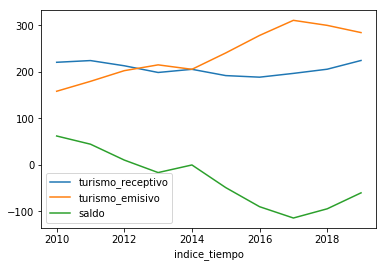

In [11]:
# Ej 6
df.groupby(df["indice_tiempo"].dt.year).mean().plot()

# Dos Formas de graficar

## Desde pandas

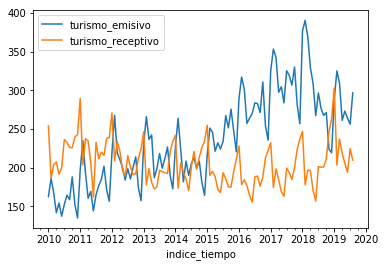

In [12]:
df.plot(x='indice_tiempo', y=['turismo_emisivo', 'turismo_receptivo'])

## Directo desde matplotlib

Text(0.5, 0, 'Año')

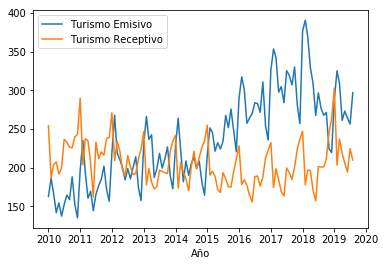

In [13]:
x = df.indice_tiempo
y1 = df.turismo_emisivo
y2 = df.turismo_receptivo
plt.plot(x,y1, label='Turismo Emisivo')
plt.plot(x,y2, label='Turismo Receptivo')
plt.legend()
plt.xlabel("Año")

# Series temporales

Vamos a ver como trabajar con datos que tienen evoluciones en el tiempo. Esta celda se puede correr solo una vez porque una vez que la columna `indice_tiempo` pasa a ser parte del indice desaparece como columna. Si queremos volver a correrla tira error porque ya no existe.

In [14]:
# Convertimos al tiempo en el indice de la tabla
df = df.set_index('indice_tiempo')

In [15]:
df[(df.index < '2012-01-01') & (df.index > '2011-01-01')]

,turismo_receptivo,turismo_emisivo,saldo
indice_tiempo,,,
2011-02-01,203.766,235.252,-31.486
2011-03-01,237.501,193.656,43.845
2011-04-01,234.815,160.422,74.393
2011-05-01,206.413,169.524,36.889
2011-06-01,161.923,144.157,17.766
2011-07-01,232.926,165.239,67.687
2011-08-01,211.817,176.613,35.204
2011-09-01,220.302,184.915,35.387
2011-10-01,216.055,202.002,14.053


## Extraemos tendencias

In [16]:
df['media_emisivo'] = df.turismo_emisivo.rolling(window=12, center=True, min_periods=1).mean()
df['media_receptivo'] = df.turismo_receptivo.rolling(window=12, center=True, min_periods=1).mean()


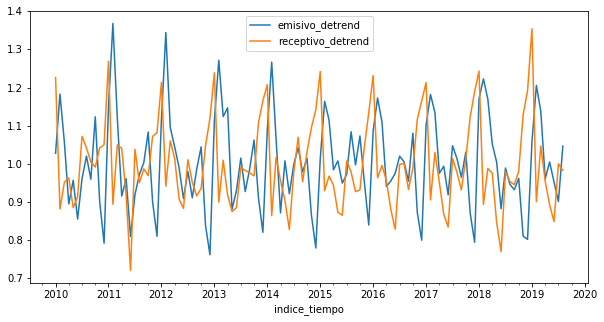

In [17]:
df['emisivo_detrend'] = df.turismo_emisivo / df.media_emisivo
df['receptivo_detrend'] = df.turismo_receptivo / df.media_receptivo
df.plot(y=['emisivo_detrend', 'receptivo_detrend'], figsize=(10,5))

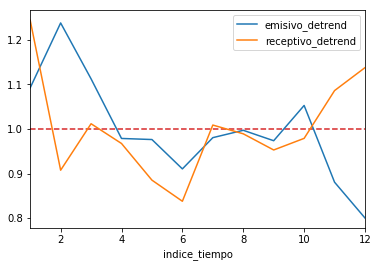

In [18]:
ax = df.groupby(df.index.month)['emisivo_detrend', 'receptivo_detrend'].mean().plot()
ax.hlines(1, xmin=1, xmax=12, linestyle='--', color='C3')
plt.xlim(1,12);


## Agregando variables externas

Vamos a trabajar con una API del portal

In [19]:
cambio = pd.read_csv('https://infra.datos.gob.ar/catalog/sspm/dataset/116/distribution/116.3/download/indice-tipo-cambio-real-multilateral-mensual-base-2015.csv')
cambio.indice_tiempo = pd.to_datetime(cambio.indice_tiempo)
cambio = cambio.set_index('indice_tiempo')
cambio.head(5)

,tipo_cambio_real_multilateral_actual,tipo_cambio_real_brasil,tipo_cambio_real_canada,tipo_cambio_real_chile,tipo_cambio_real_estados_unidos,tipo_cambio_real_mexico,tipo_cambio_real_uruguay,tipo_cambio_real_china,tipo_cambio_real_india,tipo_cambio_real_japon,tipo_cambio_real_reino_unido,tipo_cambio_real_suiza,tipo_cambio_real_zona_euro
indice_tiempo,,,,,,,,,,,,,
1997-01-01,85.383644,120.293767,77.040488,92.410634,70.202917,75.118073,75.986229,58.822253,55.310966,30.369152,81.151975,69.217769,85.778840
1997-02-01,84.041727,120.047629,76.683229,94.334228,70.064503,76.722946,76.143838,59.841290,55.053702,29.295305,78.791323,65.957614,81.596625
1997-03-01,83.801680,119.824771,75.865720,95.373757,70.176495,76.314985,76.205516,59.818304,55.176279,30.048992,78.486974,65.527009,80.645248
1997-04-01,84.058659,120.706598,74.994523,95.255751,70.509441,78.026422,76.307638,59.656265,55.822765,29.846162,79.945213,65.945115,80.401607
1997-05-01,84.526262,120.883186,75.983417,95.521562,70.698458,79.020037,76.481236,60.117393,56.002181,31.564684,80.472165,67.338041,80.972139


In [20]:
# Agregamos el tipo de cambio
df['cambio'] = cambio.tipo_cambio_real_multilateral_actual
df

,turismo_receptivo,turismo_emisivo,saldo,media_emisivo,media_receptivo,emisivo_detrend,receptivo_detrend,cambio
indice_tiempo,,,,,,,,
2010-01-01,254.157,162.680,91.477,158.279333,207.222667,1.027803,1.226492,141.431199
2010-02-01,186.441,186.227,0.214,157.425000,211.415286,1.182957,0.881871,135.747253
2010-03-01,203.821,167.262,36.559,158.316625,214.116750,1.056503,0.951915,133.741202
2010-04-01,207.516,141.750,65.766,158.356333,215.464333,0.895133,0.963111,132.617700
2010-05-01,191.665,154.430,37.235,161.340500,216.514600,0.957168,0.885229,128.204846
2010-06-01,199.736,137.327,62.409,160.533455,218.623364,0.855442,0.913608,126.606107
2010-07-01,236.571,152.299,84.272,158.402750,220.655750,0.961467,1.072127,127.962655
2010-08-01,233.027,164.558,68.469,161.233750,223.612250,1.020618,1.042103,127.724230
2010-09-01,226.245,158.674,67.571,165.319167,225.056000,0.959804,1.005283,128.705644


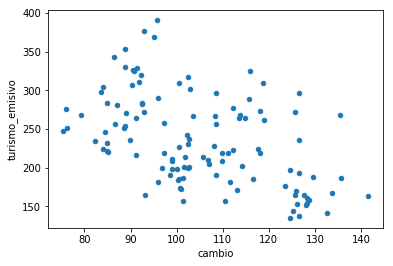

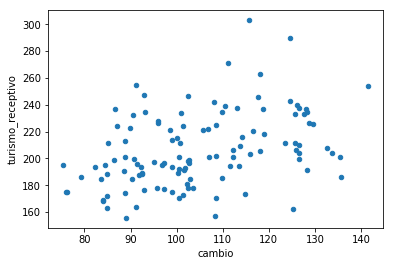

In [21]:
df.plot.scatter(x='cambio', y='turismo_emisivo')
df.plot.scatter(x='cambio', y='turismo_receptivo')


Text(0.5, 0, 'TCR')

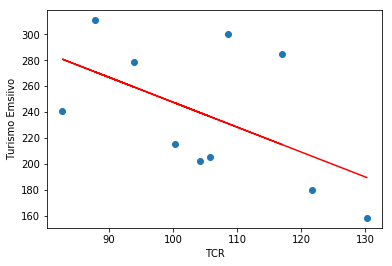

In [22]:
x = df.groupby(df.index.year).cambio.mean()
y = df.groupby(df.index.year).turismo_emisivo.mean()
plt.scatter(x, y)
p = np.polyfit(x, y, 1)
plt.plot(x, np.polyval(p, x), 'r')
plt.ylabel('Turismo Emsiivo')
plt.xlabel('TCR')

Text(0.5, 0, 'TCR')

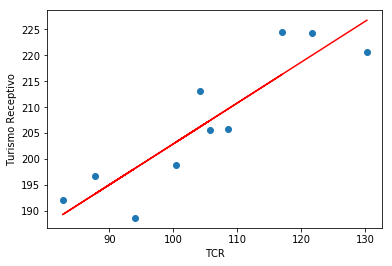

In [23]:
x = df.groupby(df.index.year).cambio.mean()
y = df.groupby(df.index.year).turismo_receptivo.mean()
plt.scatter(x, y)
p = np.polyfit(x, y, 1)
plt.plot(x, np.polyval(p, x), 'r')
plt.ylabel('Turismo Receptivo')
plt.xlabel('TCR')

# Ejercicio

Investigar la evolucion del consumo de energia en el pais a lo largo del tiempo. Es probable que te convenga crear un notebook de cero en lugar de trabajar en este. Usa el buscador de series de tiempo para encontrar la serie o series que te interesen  / necesites para tu analisis: http://datos.gob.ar/series/api . 

## Preguntas guia

1. ¿Hay una tendencia general?
1. ¿Hay un comportamiento periodico? ¿Que periodo tiene?
1. ¿Que variables se te ocurren que pueden ser interesantes cruzar?
